#I got thinkin... what is the average age of the top female lifters?
We know that the average peak strenght happens somewhere around later 20s to early 30s, at least in men. Just by glancing over the OPL data, it's clear that some of the top female lifters are in their 30s and some even in their 40s, especially in the heavier weight-classes...
##Proposh:

# 🏋️‍♀️ Project Proposal: Age of Peak Performance in Female Powerlifting

## 🔍 Objective
This project explores **the age at which female powerlifters tend to reach peak performance**, using publicly available data from the [Open Powerlifting database](https://www.openpowerlifting.org/). It aims to answer:

- What is the **average age** of top-performing female lifters?
- How does the **choice of performance metric** (DOTS vs Total) influence the perceived peak age?
- Are there observable trends by **testing status** or **weight class**?

## 🎯 Why This Matters
Powerlifting is a sport with a unique relationship to age — where strength doesn't necessarily decline as quickly as in other sports. Understanding when women hit their peak can:
- Help **athletes and coaches** set realistic long-term goals
- Highlight **biases** in existing strength scoring systems (like DOTS)
- Encourage more inclusive and accurate analysis in **sports data science**

## 🛠️ Methodology
1. **Data Filtering**
   - Subset OpenPowerlifting data to include only female lifters with non-null age and relevant meet data.

2. **Define "Top" Lifters**
   - Use both **DOTS** and **Total** to calculate percentiles (top 1%, 5%, etc.).
   - Compare the average and median ages within each top group.

3. **Visualization**
   - Histograms and boxplots for age distributions
   - Comparison plots between DOTS and Total groups
   - Optional: include Tested vs Untested overlays

4. **Exploration of Bias**
   - Discuss how strength formulas (like DOTS) may impact women disproportionately
   - Include citations or notes from your previous analysis on DOTS fairness




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports and load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/USGOPLProject/openpowerlifting-2025-05-24-d228cac8.csv'
df = pd.read_csv(file_path, low_memory=False)

In [ ]:
# arright, let's start this EDA

df.columns = df.columns.str.lower()
# df.head()

In [ ]:
# what we workin with
df.columns

Index(['name', 'sex', 'event', 'equipment', 'age', 'ageclass',
       'birthyearclass', 'division', 'bodyweightkg', 'weightclasskg',
       'squat1kg', 'squat2kg', 'squat3kg', 'squat4kg', 'best3squatkg',
       'bench1kg', 'bench2kg', 'bench3kg', 'bench4kg', 'best3benchkg',
       'deadlift1kg', 'deadlift2kg', 'deadlift3kg', 'deadlift4kg',
       'best3deadliftkg', 'totalkg', 'place', 'dots', 'wilks', 'glossbrenner',
       'goodlift', 'tested', 'country', 'state', 'federation',
       'parentfederation', 'date', 'meetcountry', 'meetstate', 'meettown',
       'meetname', 'sanctioned'],
      dtype='object')

In [ ]:
# less grab the gorls
df_female = df[
    (df['sex'] == 'F') &
    (df['age'].notnull()) &
    (df['totalkg'].notnull()) &
    (df['dots'].notnull())
].copy()

In [ ]:
# find the age deets
df_female['age'].describe()

,age
count,576083.000000
mean,30.245169
std,12.643819
min,0.500000
25%,20.500000
50%,27.000000
75%,38.000000
max,98.000000


In [ ]:
# find age outliers
df_female['age'].sort_values(ascending=False)

,age
479883,98.0
481925,97.0
481116,96.0
481392,96.0
3515750,95.5
...,...
2058793,0.5
2220994,0.5
2198008,0.5
3014331,0.5


In [ ]:
# lol REMOVING outliers (these digits can be changed)

df_female = df_female[(df_female['age'] >= 13) & (df_female['age'] <= 70)]

In [ ]:
# let's analyze the top 1%

dots_99 = df_female['dots'].quantile(0.99)
total_99 = df_female['totalkg'].quantile(0.99)

df_female['top_1_dots'] = df_female['dots'] >= dots_99
df_female['top_1_total'] = df_female['totalkg'] >= total_99

In [ ]:
# maybe 5% too

dots_95 = df_female['dots'].quantile(0.95)
total_95 = df_female['totalkg'].quantile(0.95)

df_female['top_5_dots'] = df_female['dots'] >= dots_95
df_female['top_5_total'] = df_female['totalkg'] >= total_95

In [ ]:
df_female.sort_values(
    by=['top_1_dots', 'top_1_total', 'dots', 'totalkg'],
    ascending=[False, False, False, False],
    inplace=True
)
# df_female.head()

In [ ]:
df_top_both = df_female[(df_female['top_1_dots']) & (df_female['top_1_total'])]

df_top_both.sort_values(by=['dots', 'totalkg'], ascending=[False, False], inplace=True)

# df_top_both.head(10)

<ipython-input-37-4cc241766943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_both.sort_values(by=['dots', 'totalkg'], ascending=[False, False], inplace=True)


In [ ]:
# yikes, let me drop duplicates

df_unique_dots = df_female.sort_values('dots', ascending=False).drop_duplicates(subset='name')
df_unique_total = df_female.sort_values('totalkg', ascending=False).drop_duplicates(subset='name')

In [ ]:
# df_unique_dots.head()

In [ ]:
# df_unique_total.head()

In [ ]:
# let's get down to bsns

age_summary = pd.DataFrame({
    'Group': ['Top 1% DOTS', 'Top 1% Total', 'Top 1% Both', 'All Female Lifters'],
    'Mean Age': [
        df_female[df_female['top_1_dots']]['age'].mean(),
        df_female[df_female['top_1_total']]['age'].mean(),
        df_female[df_female['top_1_dots'] & df_female['top_1_total']]['age'].mean(),
        df_female['age'].mean()
    ],
    'Median Age': [
        df_female[df_female['top_1_dots']]['age'].median(),
        df_female[df_female['top_1_total']]['age'].median(),
        df_female[df_female['top_1_dots'] & df_female['top_1_total']]['age'].median(),
        df_female['age'].median()
    ]
})

age_summary

,Group,Mean Age,Median Age
0,Top 1% DOTS,30.527279,29.0
1,Top 1% Total,30.471947,29.0
2,Top 1% Both,31.021080,29.5
3,All Female Lifters,30.181796,27.0


so, yeah, forget everything I said lmao
# HUMBLED by the data, as per ush

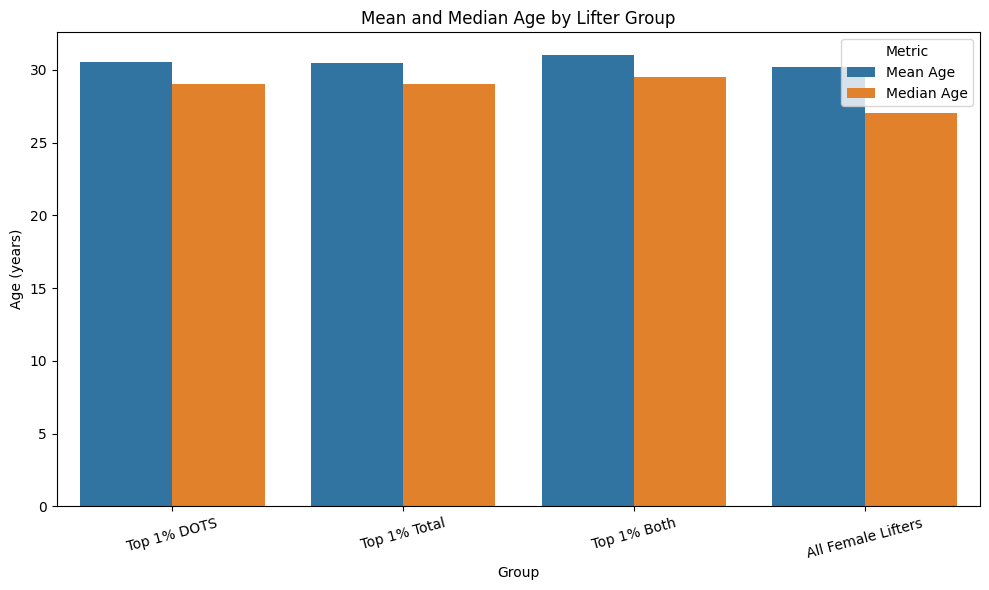

In [ ]:
# let's get some viz going

age_melted = age_summary.melt(id_vars='Group', var_name='Metric', value_name='Age')

plt.figure(figsize=(10, 6))
sns.barplot(data=age_melted, x='Group', y='Age', hue='Metric')
plt.title('Mean and Median Age by Lifter Group')
plt.ylabel('Age (years)')
plt.xlabel('Group')
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

let's dive deeper into the 1% sea...

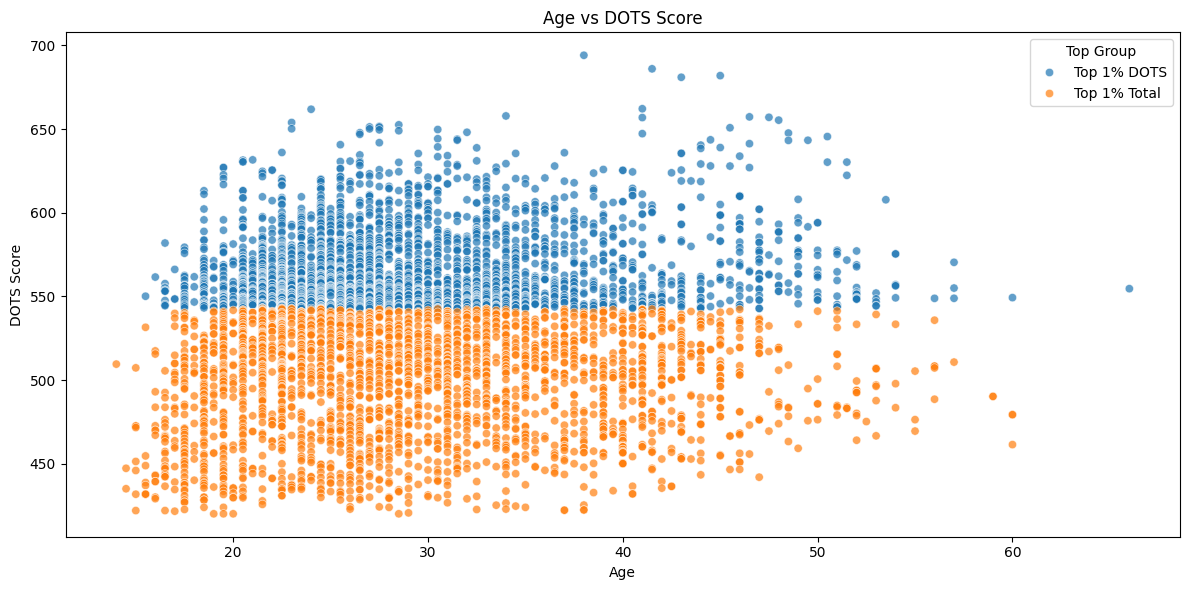

In [ ]:
# thinking of a scatter plot, let's see how this looks

#labels
def categorize(row):
    if row['top_1_dots'] and row['top_1_total']:
        return 'Top 1% Both'
    elif row['top_1_dots']:
        return 'Top 1% DOTS'
    elif row['top_1_total']:
        return 'Top 1% Total'
    else:
        return 'Other'

df_female['Top Group'] = df_female.apply(categorize, axis=1)

# df_top = df_female[df_female['Top Group'] != 'Other'].copy()
# decided to drop the 'both' group for more clarity, feel free to add it back in if you are curious
df_top_simple = df_female[df_female['Top Group'].isin(['Top 1% DOTS', 'Top 1% Total'])].copy()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_simple, x='age', y='dots', hue='Top Group', alpha=0.7)
plt.title('Age vs DOTS Score')
plt.xlabel('Age')
plt.ylabel('DOTS Score')
plt.legend(title='Top Group')
plt.tight_layout()
plt.show()

❤ ❤ ❤ ⚡ ⚡ ⚡

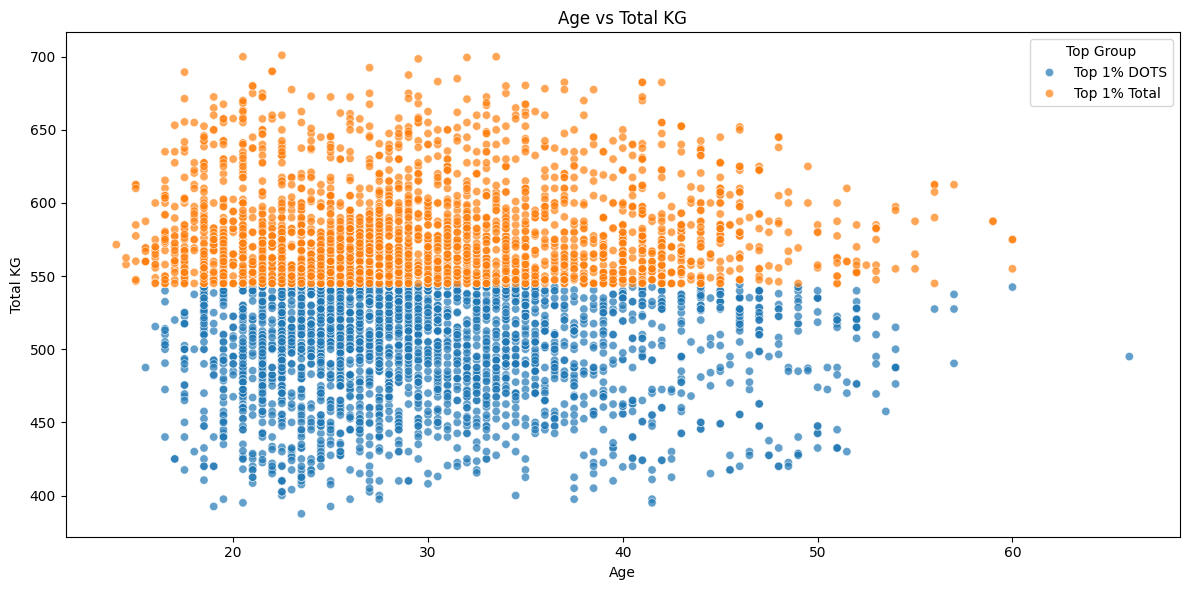

In [ ]:
# now total

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_simple, x='age', y='totalkg', hue='Top Group', alpha=0.7)
plt.title('Age vs Total KG')
plt.xlabel('Age')
plt.ylabel('Total KG')
plt.legend(title='Top Group')
plt.tight_layout()
plt.show()

let's explore tested vs untested

In [ ]:
# feature engineering

df_female['Test Status'] = df_female['tested'].fillna('Untested').replace('Yes', 'Tested')

# taking off the 'both' group altogether

df_dots_only = df_female[df_female['top_1_dots'] & ~df_female['top_1_total']].copy()

df_total_only = df_female[df_female['top_1_total'] & ~df_female['top_1_dots']].copy()

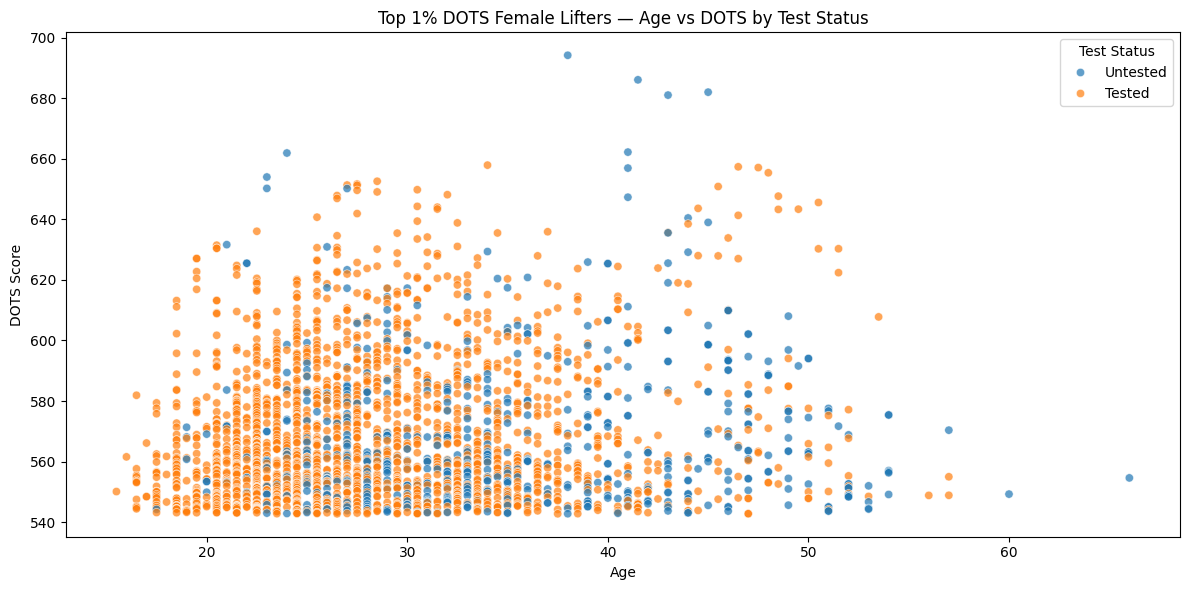

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_dots_only, x='age', y='dots', hue='Test Status', alpha=0.7)
plt.title('Top 1% DOTS Female Lifters — Age vs DOTS by Test Status')
plt.xlabel('Age')
plt.ylabel('DOTS Score')
plt.legend(title='Test Status')
plt.tight_layout()
plt.show()

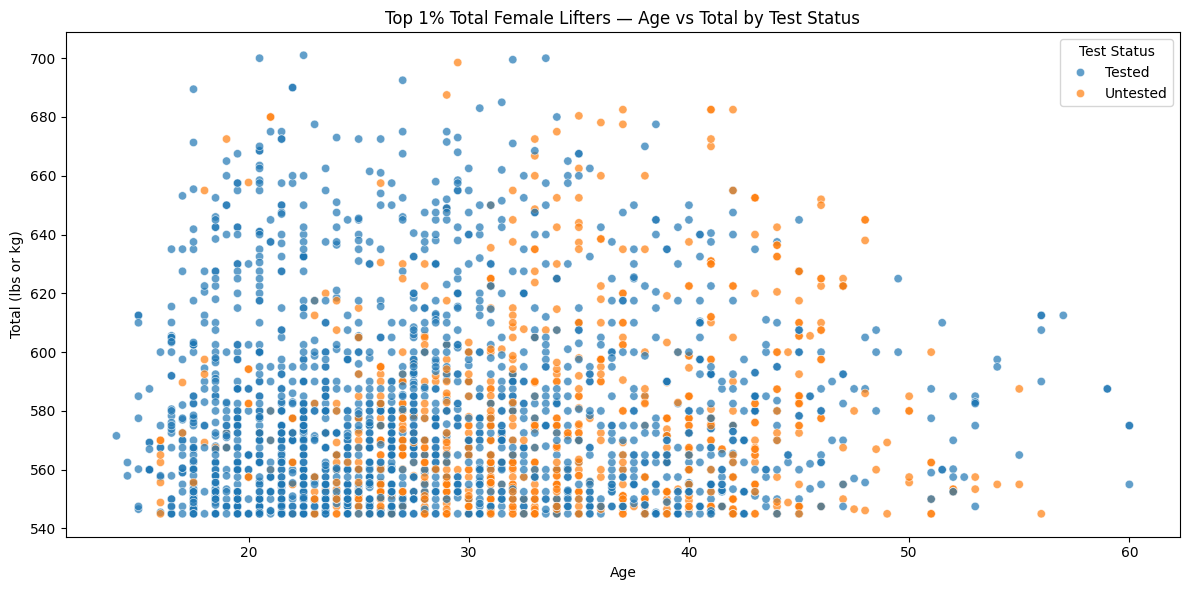

In [ ]:
# bruh, seaborn,  literally same code and you wanna give me switched colors??? HOW DARE YOU - YOU ARE FIRED

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_total_only, x='age', y='totalkg', hue='Test Status', alpha=0.7)
plt.title('Top 1% Total Female Lifters — Age vs Total by Test Status')
plt.xlabel('Age')
plt.ylabel('Total (kg)')
plt.legend(title='Test Status')
plt.tight_layout()
plt.show()

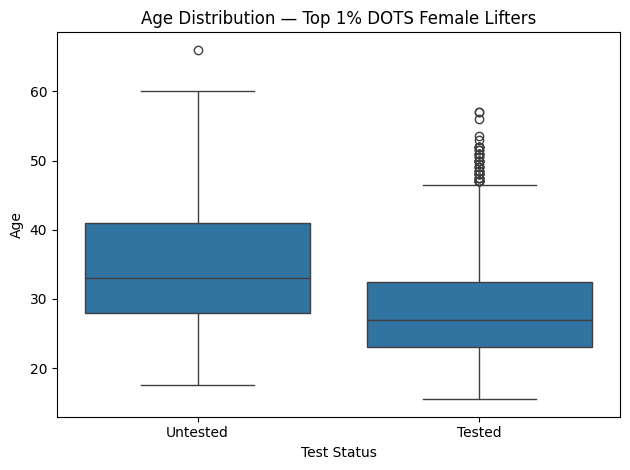

In [ ]:
# ok, maybe not fired but def going with a different viz (for the color challenged people out there lol)

# cause I know you like a boxplot - DOTS top 1%
sns.boxplot(data=df_dots_only, x='Test Status', y='age')
plt.title('Age Distribution — Top 1% DOTS Female Lifters')
plt.ylabel('Age')
plt.xlabel('Test Status')
plt.tight_layout()
plt.show()

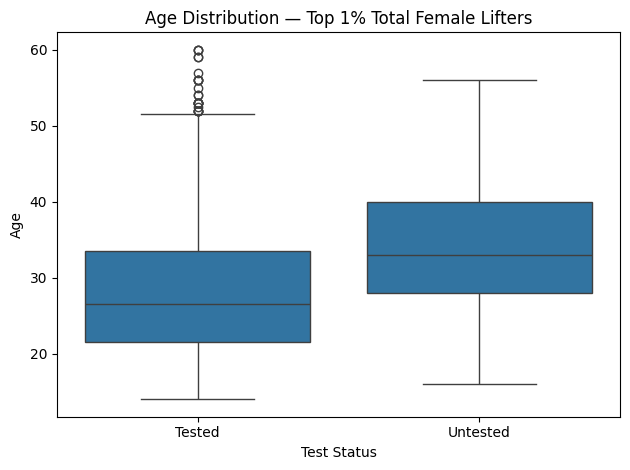

In [ ]:
# TOTAL top 1% - seaborn is REALLY getting on my nerves today...
sns.boxplot(data=df_total_only, x='Test Status', y='age')
plt.title('Age Distribution — Top 1% Total Female Lifters')
plt.ylabel('Age')
plt.xlabel('Test Status')
plt.tight_layout()
plt.show()

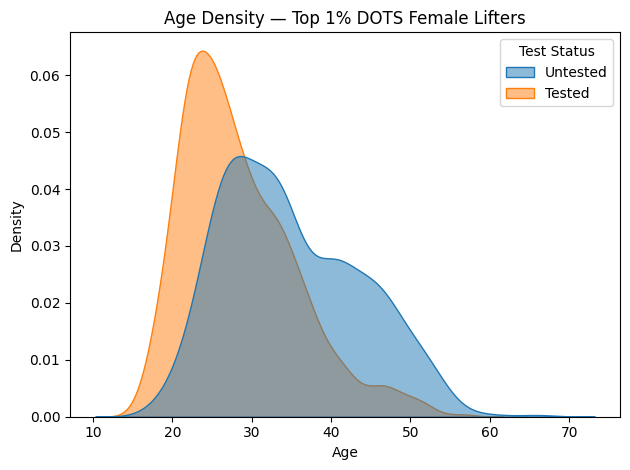

In [ ]:
# DOTS
sns.kdeplot(data=df_dots_only, x='age', hue='Test Status', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Density — Top 1% DOTS Female Lifters')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

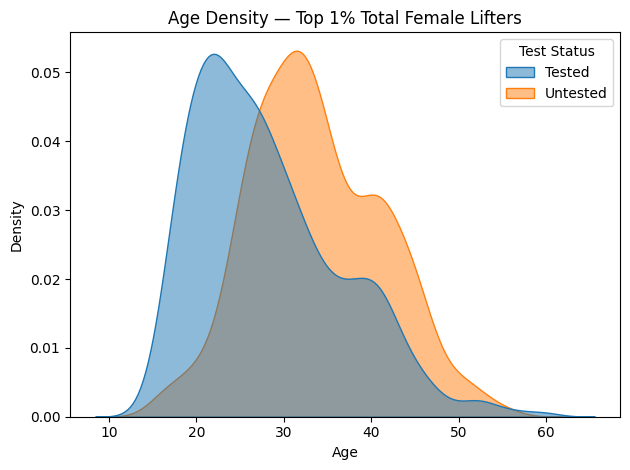

In [ ]:
# TOTAL - ok FINE, i see why the different color labels. I STILL DONT LIKE IT
sns.kdeplot(data=df_total_only, x='age', hue='Test Status', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Density — Top 1% Total Female Lifters')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()